## Mownit laboratorium 2
### DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- należy zaistalować pakiety:

```julia
Pkg.add("DataFrames")
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- od wersji 0.11 każda z kolumn jest typu Array{T,1} gdzie T jest okreslonym typem danych (np. Float64)
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja najnowszej wersji 0.14 : https://juliadata.github.io/DataFrames.jl/stable/index.html





In [1]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1[:MojaKolumna]= 1:4
df1[:Col2]= [4,pi,sqrt(2), 42]
df1[:Col3]= [true,false, true, false]
show(df1)

4×3 DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
│     │ Int64       │ Float64 │ Bool  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 1           │ 4.0     │ true  │
│ 2   │ 2           │ 3.14159 │ false │
│ 3   │ 3           │ 1.41421 │ true  │
│ 4   │ 4           │ 42.0    │ false │

In [2]:
typeof(df1[:Col2])

Array{Float64,1}

In [3]:
typeof(df1[:Col3])

Array{Bool,1}

In [4]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[2,pi, sqrt(2), 3, 4,2,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.0,true
7,7,3.14159,true
8,8,1.41421,false
9,9,3.0,true


In [5]:
# ilosc wierszy
size(df2, 1) 

10

In [6]:
#ilosc kolumn
size(df2, 2) 

3

In [7]:
# można odwoływać się po indeksie
show(df2[2])

[2.0, 3.14159, 1.41421, 3.0, 4.0, 2.0, 3.14159, 1.41421, 3.0, 4.0]

In [8]:
# albo po symbolu kolumny
show(df2[:Col2])

[2.0, 3.14159, 1.41421, 3.0, 4.0, 2.0, 3.14159, 1.41421, 3.0, 4.0]

In [9]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

1×3 DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
│     │ Int64       │ Float64 │ Bool  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 3           │ 1.41421 │ false │

In [10]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,2,3.14159,true
2,3,1.41421,false


In [11]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Array{Float64,1}:
 3.141592653589793 
 1.4142135623730951

In [12]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
,Float64,Bool
1,3.14159,true
2,1.41421,false


In [13]:
# pierwsze sześć wierszy
DataFrames.head(df2)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,true
2,2,3.14159,true
3,3,1.41421,false
4,4,3.0,true
5,5,4.0,false
6,6,2.0,true


In [14]:
# ostatnie sześć wierszy
DataFrames.tail(df2)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,5,4.0,false
2,6,2.0,true
3,7,3.14159,true
4,8,1.41421,false
5,9,3.0,true
6,10,4.0,false


In [15]:
# nazwy kolumn
names(df2)

3-element Array{Symbol,1}:
 :MojaKolumna
 :Col2       
 :Col3       

In [16]:
# typy kolumn
eltypes(df2)

3-element Array{Type,1}:
 Int64  
 Float64
 Bool   

In [17]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,MojaKolumna,5.5,1,5.5,10,,,Int64
2,Col2,2.71116,1.41421,3.0,4.0,,,Float64
3,Col3,0.6,false,1.0,true,,,Bool


In [18]:
using Statistics
mean(df2[:Col2])

2.711161243192578

In [19]:
var(df2[:Col2])

0.9150284373648316

In [21]:
using CSV
input="winequality.csv"
mydata=CSV.read(input, delim=";")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
5,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7,7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5
8,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


In [22]:
typeof(mydata)

DataFrame

In [23]:
size(mydata)

(1599, 12)

In [25]:
# grupowanie wierszy (tutaj po jakości (quality))
# ostatni argument to funkcja albo wyrażenie 
#https://juliadata.github.io/DataFrames.jl/stable/man/split_apply_combine.html
# przyklad: zliczanie ilosci win pogrupowanych po jakości
wine_grouped=by(mydata, :quality, df->size(df,1))

,quality,x1
,Int64⍰,Int64
1,5,681
2,6,638
3,7,199
4,4,53
5,8,18
6,3,10


In [27]:
#zaawansowane dzialanie na podgrupach
df2=by(mydata, [:quality, :alcohol]) do mySubGroup
          DataFrame(size = size(mySubGroup,1))
        end
sort(df2, [:quality, :alcohol])

,quality,alcohol,size
,Int64⍰,Float64⍰,Int64
1,3,8.4,1
2,3,9.0,1
3,3,9.7,1
4,3,9.8,1
5,3,9.9,1
6,3,9.95,1
7,3,10.2,1
8,3,10.7,1
9,3,10.9,1


In [28]:
# zapis do pliku
# https://juliadata.github.io/DataFrames.jl/stable/man/getting_started.html#Importing-and-Exporting-Data-(I/O)-1
CSV.write("dataframe1.csv", mydata)

"dataframe1.csv"


### Graficzna reprezentacja DataFrames

Do wyświetlania danych statystycznych dobrym wyborem jest dodatkowy pakiet do pakietu Plots 

```julia
Pkg.add("StatPlots")
```
https://github.com/JuliaPlots/StatPlots.jl

Niestety Juliabox (chwilowo) nie pozwala na zainstalowanie dowolnych pakietow.

In [36]:
using DataFrames
df = DataFrame(a = 1:10, b = 10 .* rand(10), c = 10 .* rand(10), d=rand(10), e=map(x->x%2,(1:10)))


,a,b,c,d,e
,Int64,Float64,Float64,Float64,Int64
1,1,8.38785,6.12652,0.142779,1
2,2,0.178269,9.29066,0.867925,0
3,3,1.89601,6.44629,0.216165,1
4,4,8.49066,6.57371,0.313048,0
5,5,5.33203,6.82615,0.682787,1
6,6,5.60695,2.83611,0.413981,0
7,7,9.52871,1.14021,0.902434,1
8,8,1.32607,9.74453,0.100383,0
9,9,1.347,9.35129,0.152628,1


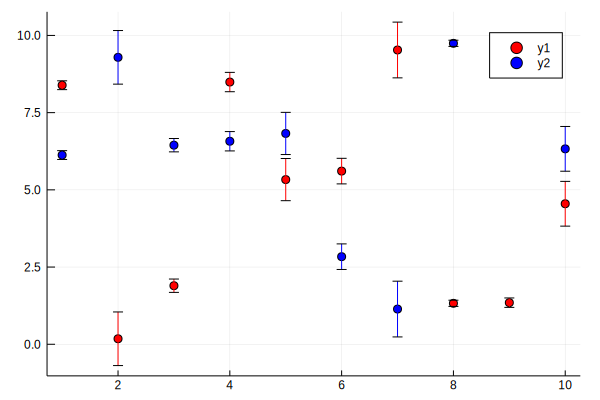

In [37]:
# zamiast makra @df z pakietu StatPlots mozna odwolywac sie bezposrednio do kolumn (gdyz sa typu jednowymiarowych tablic 
# Array{T,1})
using Plots
scatter(df[:a], [df[:b], df[:c]], colour = [:red :blue], yerr=df[:d])


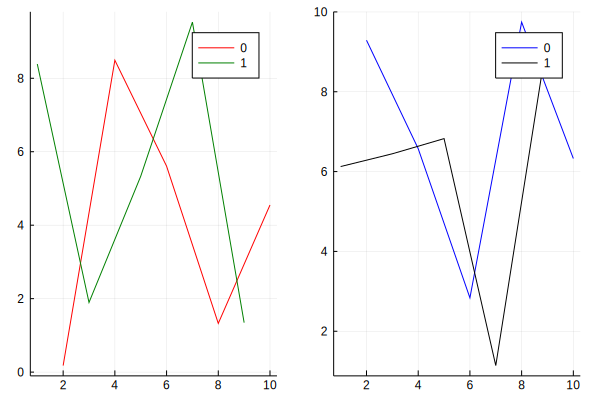

In [38]:
plot(df[:a], [df[:b], df[:c]], group=df[:e], colour = [:red :blue :green :black], layout=2)

### Zadanie 
- Napisać program w języku C używającego  interfejsu GSL do BLAS:<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_ddot"> funkcji gsl_blas_ddot </a> (mnożenie dwóch wektorów) i 
<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_dgemv">gsl_blas_dgemv</a> (mnożenie macierzy przez wektor). <a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#examples"> Przykłady użycia.</a>
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji BLAS w zależności od rozmiaru wektora (macierzy) osobno dla poziomu 1 i poziomu 2. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. Prosze poukladac wykresy  w tabalke za pomoca  opcji layout
- Należy zadbać o staranne podpisanie osi i wykresów.

In [15]:
#include <stdio.h>
#include <gsl/gsl_blas.h>
#include <gsl/gsl_errno.h>
#include <gsl/gsl_matrix.h>
#include <gsl/gsl_vector.h>
#include <time.h>
#include <sys/times.h>
#include <unistd.h>



     double calculate_time(clock_t start, clock_t end){
         return (double) (end - start) / sysconf(_SC_CLK_TCK);
     }

     double multiplicate_vectors(const gsl_vector *X, const gsl_vector *Y, double *result){

         return gsl_blas_ddot(X, Y, result);
     }

     void multiplicate_vector_by_matrix(gsl_matrix *A, gsl_matrix *B, gsl_matrix *RES){

         gsl_blas_dgemm(CblasNoTrans, CblasNoTrans, 1.0, A, B, 0.0, RES);

     }


     int main() {

         clock_t v_start, v_end;
         clock_t m_start, m_end;

         int A_col = 1000, A_row = 600;

         char* filePath = "/home/aleksandra/Dokumenty/Mownit/results";
         FILE* results = fopen(filePath, "w+");

         if(!results){
             printf("Something went wrong with opening file");
         }

         fprintf(results, "Dim, Type, Time \n");

         for(int i = 1; i < 11; i++){
             int vector_size = (int) (100000 * (size_t)i);
             gsl_vector *X = gsl_vector_alloc((const size_t) vector_size);
             gsl_vector *Y = gsl_vector_alloc((const size_t) vector_size);
             double result;

             for(int j = 0; j < 100000*i; j++){
                 gsl_vector_set(X, (size_t)j, 100000*j / 1.5);
             }

             for(int j = 0; j < 100000*i; j++){
                 gsl_vector_set(Y, (size_t)j, 100000*j / 2.5);
             }

             gsl_matrix *A = gsl_matrix_alloc((size_t)A_row, (size_t)A_col);
             gsl_matrix *B = gsl_matrix_alloc((size_t) A_col, (size_t)1);
             gsl_matrix *RESULT = gsl_matrix_alloc((size_t) A_row, (size_t)1);

             for(int k = 0; k < A_row; k++){
                 for(int j = 0; j < k; j++){
                     gsl_matrix_set(A, (size_t)k, (size_t)j, 100000*(k+j)/3.5);
                 }
             }

             char* type[20];
             double time[20];
             for(int j = 0; j < 20; j+=2){

                 v_start = clock();
                 multiplicate_vectors(X, Y, &result);
                 v_end = clock();
                 time[j] = calculate_time(v_start, v_end);
                 type[j] = "v";

                 m_start = clock();
                 multiplicate_vector_by_matrix(A, B, RESULT);
                 m_end = clock();
                 time[j+1] = calculate_time(m_start, m_end);
                 type[j+1] = "m";
             }

             for(int k = 0; k < 20; k++){
                 fprintf(results, "%d, %s, %0.3f \n", vector_size, type[k], time[k]);
             }

             gsl_vector_free(X);
             gsl_vector_free(Y);

             gsl_matrix_free(A);
             gsl_matrix_free(B);

         }

         return 0;
     }

LoadError: syntax: extra token "calculate_time" after end of expression

In [1]:
using DataFrames
using CSV
input = "results.csv"
data = DataFrame()
data = CSV.read(input, delim=",")

,Dim,Type,Time
,Int64⍰,String⍰,Float64⍰
1,100000,v,5.6
2,100000,m,59.82
3,100000,v,5.06
4,100000,m,55.15
5,100000,v,4.97
6,100000,m,48.57
7,100000,v,3.25
8,100000,m,29.79
9,100000,v,2.82


In [2]:
using Statistics
my_df = by(data, [:Dim,:Type], avgTime = :Time => mean, stdDev = :Time => std)

,Dim,Type,avgTime,stdDev
,Int64⍰,String⍰,Float64,Float64
1,100000,v,3.963,0.930305
2,100000,m,38.088,11.6957
3,200000,v,4.579,0.366741
4,200000,m,30.514,11.544
5,300000,v,6.573,0.697297
6,300000,m,23.344,4.12883
7,400000,v,7.899,0.370659
8,400000,m,24.441,3.70922
9,500000,v,9.223,0.652943


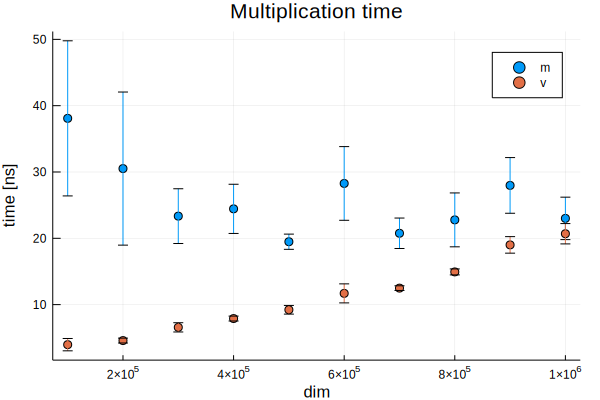

In [6]:
using DataFrames
using CSV
using Statistics
using Plots

input = "results.csv"
data = DataFrame()
data = CSV.read(input, delim=",")

my_df = by(data, [:Dim,:Type], avgTime = :Time => mean, stdDev = :Time => std)

p=scatter(my_df[:Dim],my_df[:avgTime],group=my_df[:Type],title="Multiplication time",yerr=my_df[:stdDev],xlabel="dim",ylabel="time [ns]",legend=true)

plot(p)
